In [61]:
import pandas as pd
import numpy as np

In [62]:
restaurants_df = pd.read_csv('restaurants.csv')
restaurants_df.head()

,text,service,food,anecdotes/miscellaneous,price,ambience
0,but the staff was so horrible to us,1,0,0,0,0
1,to be completely fair the only redeeming facto...,0,1,1,0,0
2,the food is uniformly exceptional with a very ...,0,1,0,0,0
3,where gabriela personaly greets you and recomm...,1,0,0,0,0
4,for those that go once and dont enjoy it all i...,0,0,1,0,0


In [63]:
restaurants_df.describe(include='all')

,text,service,food,anecdotes/miscellaneous,price,ambience
count,3044,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000
unique,3030,NaN,NaN,NaN,NaN,NaN
top,i love this place,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.196124,0.405059,0.371551,0.104796,0.141919
std,NaN,0.397128,0.490984,0.483299,0.306341,0.349024
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,1.000000,1.000000,0.000000,0.000000


In [64]:
restaurants_df.shape

(3044, 6)

In [65]:
restaurants_df.nunique()

text                       3030
service                       2
food                          2
anecdotes/miscellaneous       2
price                         2
ambience                      2
dtype: int64

In [66]:
restaurants_df['text']
               

0                     but the staff was so horrible to us
1       to be completely fair the only redeeming facto...
2       the food is uniformly exceptional with a very ...
3       where gabriela personaly greets you and recomm...
4       for those that go once and dont enjoy it all i...
                              ...                        
3039                        but that is highly forgivable
3040    from the appetizers we ate the dim sum and oth...
3041    when we arrived at 600 pm the restaurant was p...
3042    each table has a pot of boiling water sunken i...
3043             i am going to the mid town location next
Name: text, Length: 3044, dtype: object

In [67]:
restaurants_df[restaurants_df['text'] == 'i love this place']

,text,service,food,anecdotes/miscellaneous,price,ambience
984,i love this place,0,0,1,0,0
1188,i love this place,0,0,1,0,0
1547,i love this place,0,0,1,0,0


In [68]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)

In [69]:
tokenizer.fit_on_texts(restaurants_df['text']) 
sequences = tokenizer.texts_to_sequences(restaurants_df['text'])

In [70]:
sequences

[[16, 1, 88, 7, 35, 406, 4, 90],
 [4,
  32,
  617,
  837,
  1,
  74,
  2134,
  1471,
  7,
  1,
  12,
  84,
  7,
  448,
  227,
  16,
  523,
  140,
  85,
  9,
  41,
  1,
  103,
  2135,
  8,
  2136],
 [1,
  12,
  5,
  2137,
  978,
  17,
  3,
  34,
  1472,
  561,
  84,
  56,
  2138,
  2139,
  85,
  1473,
  15,
  242,
  43,
  266,
  745,
  40,
  25,
  1,
  70,
  53,
  19],
 [237, 2140, 2141, 2142, 15, 2, 2143, 15, 71, 4, 104],
 [9,
  298,
  21,
  36,
  216,
  2,
  61,
  278,
  11,
  41,
  6,
  83,
  156,
  5,
  21,
  29,
  60,
  61,
  51,
  11],
 [19, 74, 7, 1, 12, 385, 16, 1, 98, 2144, 30, 23],
 [11, 5, 34, 407, 2, 19, 34, 153],
 [49,
  2145,
  203,
  5,
  1,
  2146,
  17,
  2147,
  2,
  137,
  299,
  1,
  386,
  22,
  350,
  238,
  4,
  838,
  1,
  172,
  10,
  449,
  35,
  15,
  51,
  4,
  1474,
  204,
  1186],
 [1, 279, 20, 48, 385, 188, 17, 3, 408, 1475, 204, 1476, 255, 19, 2148],
 [1477, 1, 12, 562, 5, 212, 24],
 [64,
  839,
  2149,
  2150,
  2151,
  450,
  2152,
  679,
  840,
  2153,

In [71]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [72]:
vec_sequences = vectorize(sequences)

In [73]:
vec_sequences

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [74]:
labels = restaurants_df.values[:,1:6].astype('float32')

In [75]:
labels

array([[1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='sigmoid'))

In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1280128   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,297,285
Trainable params: 1,297,285
Non-trainable params: 0
_________________________________________________________________


In [79]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(vec_sequences, labels, test_size=800)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=1700)

In [80]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1700, 10000)
(544, 10000)
(800, 10000)
(1700, 5)
(544, 5)
(800, 5)


In [81]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)

In [82]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks = [es])

Epoch 1/20
54/54 [==============================] - 2s 23ms/step - loss: 0.5793 - accuracy: 0.3829 - val_loss: 0.4767 - val_accuracy: 0.4871
Epoch 2/20
54/54 [==============================] - 1s 18ms/step - loss: 0.4187 - accuracy: 0.6012 - val_loss: 0.3692 - val_accuracy: 0.6599
Epoch 3/20
54/54 [==============================] - 1s 19ms/step - loss: 0.2805 - accuracy: 0.7706 - val_loss: 0.3117 - val_accuracy: 0.7335
Epoch 4/20
54/54 [==============================] - 1s 18ms/step - loss: 0.1748 - accuracy: 0.8653 - val_loss: 0.2938 - val_accuracy: 0.7316
Epoch 5/20
54/54 [==============================] - 1s 18ms/step - loss: 0.1077 - accuracy: 0.8853 - val_loss: 0.3092 - val_accuracy: 0.7463
Epoch 6/20
54/54 [==============================] - 1s 18ms/step - loss: 0.0735 - accuracy: 0.8953 - val_loss: 0.3214 - val_accuracy: 0.7555
Epoch 7/20
54/54 [==============================] - 1s 18ms/step - loss: 0.0525 - accuracy: 0.9000 - val_loss: 0.3466 - val_accuracy: 0.7610
Epoch 7: earl

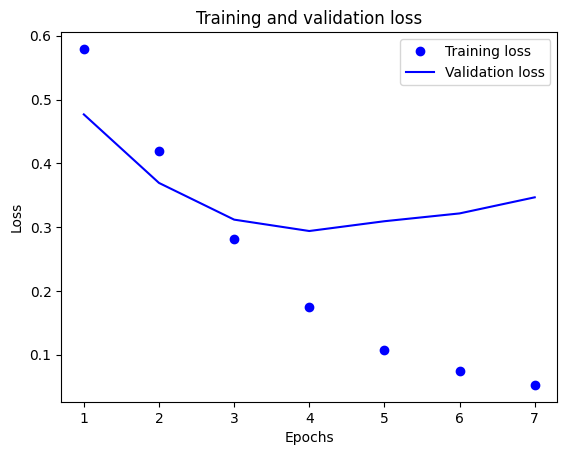

In [83]:
import matplotlib.pyplot as plt

plt.clf()
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, (len(history.history['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

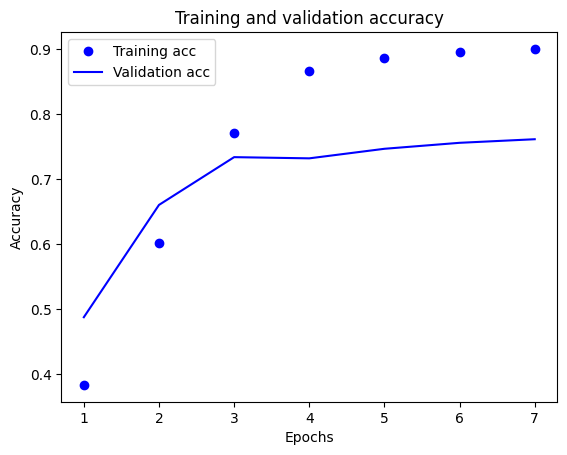

In [84]:
plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
epochs = range(1, (len(history.history['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

25/25 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.7450
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.3306886553764343, 0.7450000047683716]


In [86]:
predictions = model.predict(X_test)

25/25 [==============================] - 0s 5ms/step


In [87]:
opiniones = ['service', 'food', 'anecdotes', 'price', 'ambience']

In [88]:
for i in range(5):
    print(predictions[i])

[2.2656140e-03 3.2956426e-03 9.9822360e-01 3.2776018e-04 8.7395929e-05]
[0.00340702 0.97717273 0.01458159 0.01599338 0.00338668]
[9.0963173e-01 7.2139609e-01 5.4130767e-04 2.7611768e-03 9.1244304e-01]
[0.08130611 0.00589779 0.9194276  0.0474666  0.00367167]
[0.00135145 0.9139077  0.07227774 0.00468349 0.01711036]


In [89]:
sorted_categories = predictions[0].argsort()
sorted_categories

array([4, 3, 0, 1, 2])

In [90]:
for op in range(12):
    sorted_categories = predictions[op].argsort()
    if sorted_categories[0] >= 0.1: # al menos cree en un 10% en la mejor predicción

        for i in range(4,-1,-1):
            print("{}".format(opiniones[sorted_categories[i]])+" ({:.3})".format(predictions[op][sorted_categories[i]]))
        
        [print("labels: {}".format(opiniones[i])) for i in range(5) if y_test[op][i]]
        print("______________________________________________________________________________________________________")


anecdotes (0.998)
food (0.0033)
service (0.00227)
price (0.000328)
ambience (8.74e-05)
labels: anecdotes
______________________________________________________________________________________________________
food (0.977)
price (0.016)
anecdotes (0.0146)
service (0.00341)
ambience (0.00339)
labels: food
______________________________________________________________________________________________________
ambience (0.912)
service (0.91)
food (0.721)
price (0.00276)
anecdotes (0.000541)
labels: service
labels: food
labels: ambience
______________________________________________________________________________________________________
anecdotes (0.919)
service (0.0813)
price (0.0475)
food (0.0059)
ambience (0.00367)
labels: anecdotes
______________________________________________________________________________________________________
anecdotes (0.557)
ambience (0.087)
service (0.0694)
price (0.0585)
food (0.00161)
labels: anecdotes
__________________________________________________________